In [3]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import Lasso, Ridge
from matplotlib import pyplot as plt
import pandas as pd

1. Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

2. Модифицировать решение первого задания путем добавления 𝐿2 -регуляризации и сравнить результаты.

3 [опция]. Модернизировать решение задания 2, заменив L2 регуляризацию на L1 регуляризацию.

In [24]:
# generate regression dataset
X, y = make_regression(n_samples=10, n_features=1, n_informative=2, noise=10)

X.shape, y.shape

((10, 1), (10,))

In [25]:
X = X.T
X

array([[-2.0594457 ,  0.69685953,  0.11905644, -0.58907365,  1.4865159 ,
        -0.25459807,  1.37418483, -0.63666299,  0.11212508,  0.06788722]])

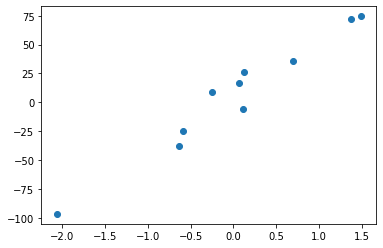

In [26]:
# plot regression dataset
plt.scatter(X,y)
plt.show()

In [7]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [20]:
def eval_model(X, y, iterations, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    errors = []
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        errors.append(err)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T)))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W, errors

def eval_sgd_model(X, y, iterations, qty_in_batch=1, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    errors =[]
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1

    for i in range(1, iterations+1):
        # эпоха обучения
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)

            # print(b, n_batch, start_, end_)

            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_mse(y_tmp, y_pred_tmp)
            errors.append(err)
            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)))

    if i % (iterations / 10) == 0:
        print(i, W, err)
        
    return W, errors

def eval_reg_l2_model(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    errors = []
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        errors.append(err)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T))) + (lambda_*W)
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W, errors

def eval_reg_l1_model(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    errors = []
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        errors.append(err)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T))) + (lambda_*np.sign(W))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W, errors

In [27]:
W_1, errors = eval_model(X, y, iterations=1500, alpha=1e-3)

150 [12.88098373] 1390.7521140293848
300 [21.96944495] 834.604485284709
450 [28.76669097] 523.5221504270279
600 [33.85034068] 349.5175982923024
750 [37.6523944] 252.1877895217126
900 [40.49594447] 197.74615820171815
1050 [42.62263113] 167.29411829513484
1200 [44.21317679] 150.26070632734167
1350 [45.4027434] 140.73303185447858
1500 [46.29241843] 135.40370728741675


In [28]:
W_2, errors_sgd = eval_sgd_model(X, y, iterations=1500, qty_in_batch=64, alpha=1e-3)

1500 [46.22511859] 135.75309945552908


In [29]:
W_3, errors_l2 = eval_reg_l2_model(X, y, iterations=1500, alpha=1e-3, lambda_=1e-7)

150 [10.20865061] 1584.8001633313468
300 [19.97060882] 943.1569782042206
450 [27.27145246] 584.2542900468643
600 [32.73166] 383.50060923481135
750 [36.81527935] 271.2069476553098
900 [39.86936601] 208.3933673351956
1050 [42.15347835] 173.25669331506845
1200 [43.86173674] 153.60140090321613
1350 [45.13932133] 142.60592355876
1500 [46.0948105] 136.45458431583847


In [30]:
W_4, errors_l1 = eval_reg_l1_model(X, y, iterations=1500, alpha=1e-3, lambda_=1e-7)

150 [12.23060505] 1436.7014959034254
300 [21.48301471] 860.3070610991244
450 [28.40287752] 537.8994582993045
600 [33.57823214] 357.5599632208283
750 [37.44887182] 256.68659314737897
900 [40.34371721] 200.2627903087395
1050 [42.50876757] 168.70196394633794
1200 [44.12800538] 151.04830906398738
1350 [45.33903081] 141.17366983528558
1500 [46.24475485] 135.6502469314472


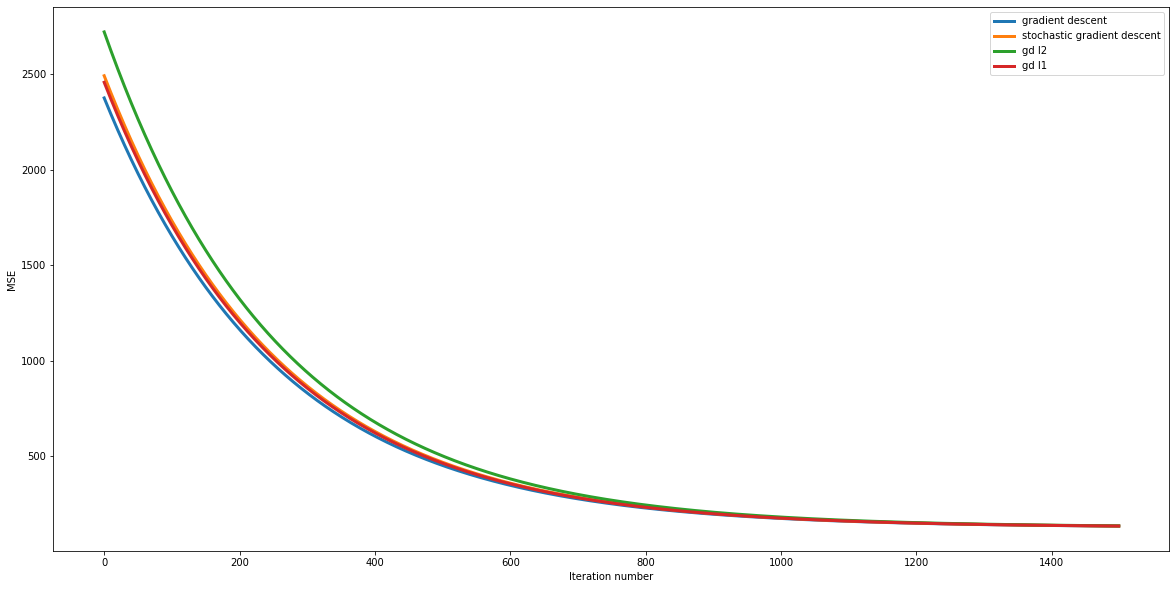

In [31]:
fig = plt.figure(figsize=(20,10))
plt.subplot(111)
plt.plot(errors, linewidth=3, label='gradient descent')
plt.plot(errors_sgd, linewidth=3, label='stochastic gradient descent')
plt.plot(errors_l2, linewidth=3, label='gd l2')
plt.plot(errors_l1, linewidth=3, label='gd l1')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.legend()     

Скорость стахостического градиентного спуска выше (оранжевая линия) градиентного спуска, за 1500 итераций достигнута самая минимальная ошибка. Самой медленной оказалась модель градиентного спуска (синяя линия). l2 медленнее, чем l1. 